#                                       Edoardo Antonaci 1234431

## Exercise 1 

### 1) Evaluate the expected values, E[X], and the variance, Var(X), for both methods

In [2]:
library("tidyverse")
cont_water<-data.frame(x=c(15.58,15.9,16,16.1,16.2),
                       p1=c(0.15,0.21,0.35,0.15,0.14),
                       p2=c(0.14,0.05,0.64,0.08,0.09)
                       )
cont_water<-mutate(cont_water,E1_x=x*p1,E2_x=x*p2,E1_x_square=p1*x*x,E2_x_square=p2*x*x)

cont_water

cat("The E[x] for the first method is",sum(cont_water$E1_x),"for the second one ",sum(cont_water$E2_x),"\n")
cat("The Var[x] for the first method is",sum(cont_water$E1_x_square)-sum(cont_water$E1_x)^2,
    "for the second one",sum(cont_water$E2_x_square)-sum(cont_water$E2_x)^2)

x,p1,p2,E1_x,E2_x,E1_x_square,E2_x_square
15.58,0.15,0.14,2.337,2.1812,36.41046,33.9831
15.90,0.21,0.05,3.339,0.7950,53.09010,12.6405
16.00,0.35,0.64,5.600,10.2400,89.60000,163.8400
16.10,0.15,0.08,2.415,1.2880,38.88150,20.7368
16.20,0.14,0.09,2.268,1.4580,36.74160,23.6196


The E[x] for the first method is 15.959 for the second one  15.9622 
The Var[x] for the first method is 0.033979 for the second one 0.02816716

## Exercise 2

### A) simulate the waiting time for 50 people at the doctor’s office and plot the relative histogram


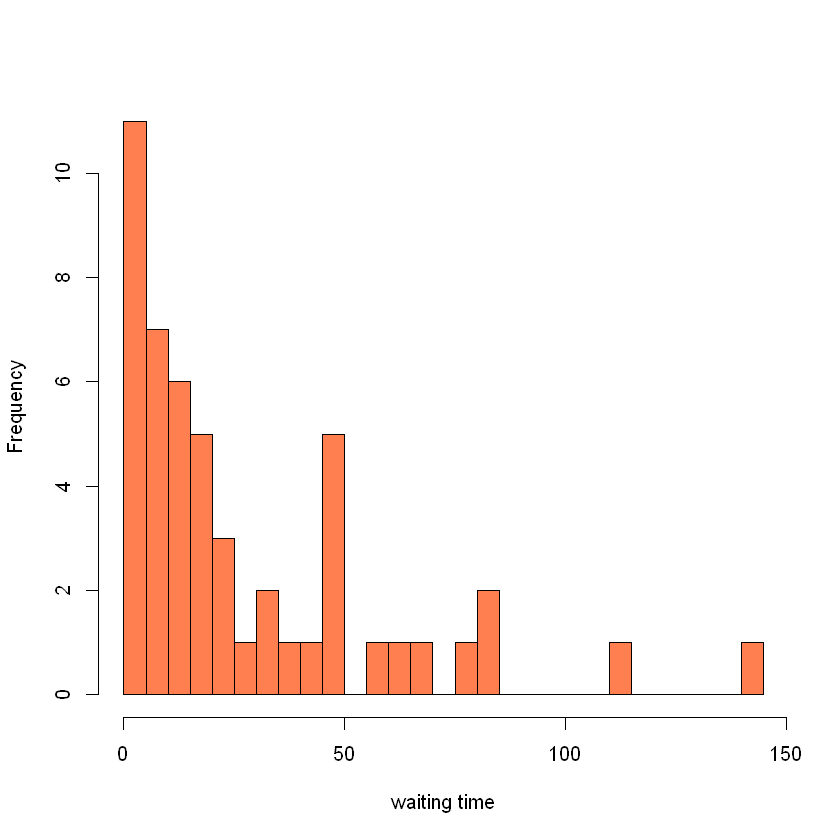

In [2]:
lambda <- 1.0/30 #rate
n_people <- 50
set.seed(1234431)
x <- rexp(n = n_people, rate =lambda)
hm <− hist ( x, col= "coral" , xlab = "waiting time", breaks=30, main = "")

### B) what is the probability that a person will wait for less than 10 minutes ?

In [3]:
cat("P(X<10) :",pexp(10,lambda))

P(X<10) : 0.2834687

### C) evaluate the average waiting time from the simulated data and compare it with the expected value (calculated from theory and by manipulating the probability distributions using R)


In [4]:
average<-mean(x)

cat("the rate from histogram is ",average,
    "\nthe rate from theory is",30
     )

the rate from histogram is  27.94597 
the rate from theory is 30

### D) what is the probability for waiting more than one hour before being received ?


In [5]:
cat("P(X>60) = ",1-pexp(60,lambda))

P(X>60) =  0.1353353

## Exercise 3

### • let’s suppose that on a book, on average, there is one typo error every three pages. If the number of errors follows a Poisson distribution, plot the pdf and cdf, and calculate the probability that there is at least one error on a specific page of the book


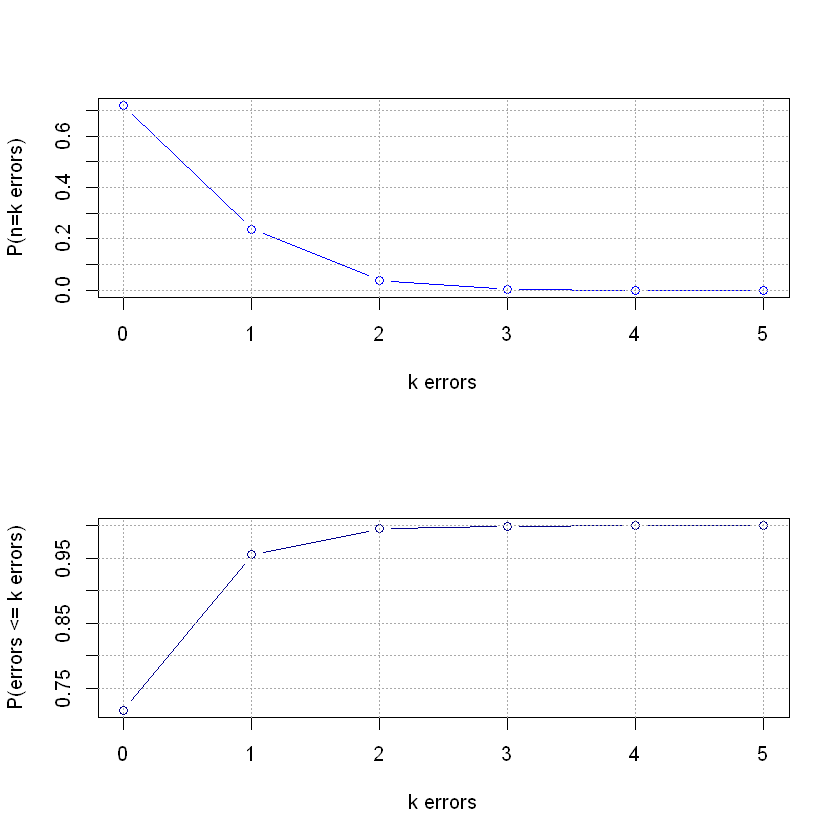

In [6]:
rate<-1.0/3
n<-100000
set.seed(1234431)

events<-rpois(n=n,lambda=rate)
poisson_process<-as.data.frame(table(events),FactorsAsString=TRUE)

errors<-as.numeric(poisson_process$events)-1
prob<-as.numeric(poisson_process$Freq)/n

par(mfrow=c(2,1))
plot(x=errors,y=prob,type="b",col="blue",
     xlab="k errors", ylab="P(n=k errors)" )
grid(nx = NULL, ny = NULL, col = "darkgray", lty = "dotted")

cum_dist<-ppois(q=errors, lambda=rate, lower.tail = TRUE, log.p = FALSE)
plot(x=errors,y=cum_dist,type="b",col="darkblue", xlab="k errors", ylab="P(errors <= k errors)" )
grid(nx = NULL, ny = NULL, col = "darkgray", lty = "dotted")


In [7]:
cat("P(errors >= 1)  =",1-ppois(q=1,lambda=rate))

P(errors >= 1)  = 0.04462492

## Exercise 4

### • we randomly draw cards from a deck of 52 cards, with replacement, until one ace is drawn. Calculate the probability that at least 10 draws are needed.

In [8]:
n_cards <- 52
n_aces <- 4
p <- pbinom(q=1,size= 9, prob=n_aces/n_cards, lower.tail = FALSE, log.p = FALSE)

cat("If we need at least 10 draws,it means that we failure for 9 times : P(# trials > 9) =" ,p)

If we need at least 10 draws,it means that we failure for 9 times : P(# trials > 9) = 0.1485109

## Exercise 5

### • the time it takes a student to complete a TOLC-I University orientation and evaluation test follows a density function of the form :
### f(X) = ( c(t − 1)(2 − t) 1 < t < 2,    0 otherwise   )
### where t is the time in hours

### a) using the integrate() R function, determine the constant c (and verify it analytically)

In [9]:
time_taken<-function(t,c=1){ return(c*(t-1)*(2-t)) }
I<-integrate(time_taken,1,2)$value

cat("The integral will be ",I,"\n")

c_norm<-1.0/I
cat("The normalization constant c will be ",c_norm)




The integral will be  0.1666667 
The normalization constant c will be  6

In [10]:
integrate(time_taken,1,2,c=c_norm )

1 with absolute error < 1.1e-14

### b) write the set of four R functions and plot the pdf and cdf, respectively

In [11]:

#density
pdf<-function(t,c=c_norm){
   f<-c()
    for (i in 1:length(t) ) {
        if(t[i]>1 & t[i]<2){
            f<-c( f,c*(t[i]-1)*(2-t[i]) )} else  { 
        f<-c(f,0)}
    }
    return(f)
}

#cumulative
cdf<-function(t,x,pdf=parent.frame()$pdf) {
    dx<-t[2]-t[1]
    
    if(x>=2){
    return(1)
    }
    
    cum<-c(dx*pdf(t=t)[1:which(t==x) ] ) 
    
    if(x<2){
    return(sum(cum))
    }

}

#quantile
qdf<-function(t,q,cdf=parent.frame()$cdf,pdf=parent.frame()$pdf){
    i<-1
    P<-0
    
    if(q>1){
        return(cat('q must be less or equal than 1 !') )
        break
    }
    
    if(q<1){
        while(P<q){
            i<-i+1
            P<-cdf(t=t,x=t[i])

        }
        return(t[i])
        }
    if(q==1){
        return(2)
    }
    
    
}   

#generation numbers

rdf<-function(a,b,n,M=time_taken(t=3.0/2,c=c_norm) ){
    r_numb<-c()
    
    while(length(r_numb)<n){
    r1<-runif(n=1)
    r2<-runif(n=1)
        
    x1<-a+(b-a)*r1
    y<-M*r2
    
    if( y<=time_taken(t=x1,c=c_norm) ){
        r_numb<-c(r_numb,x1)
    }
        
    }
    
    return(r_numb)
}


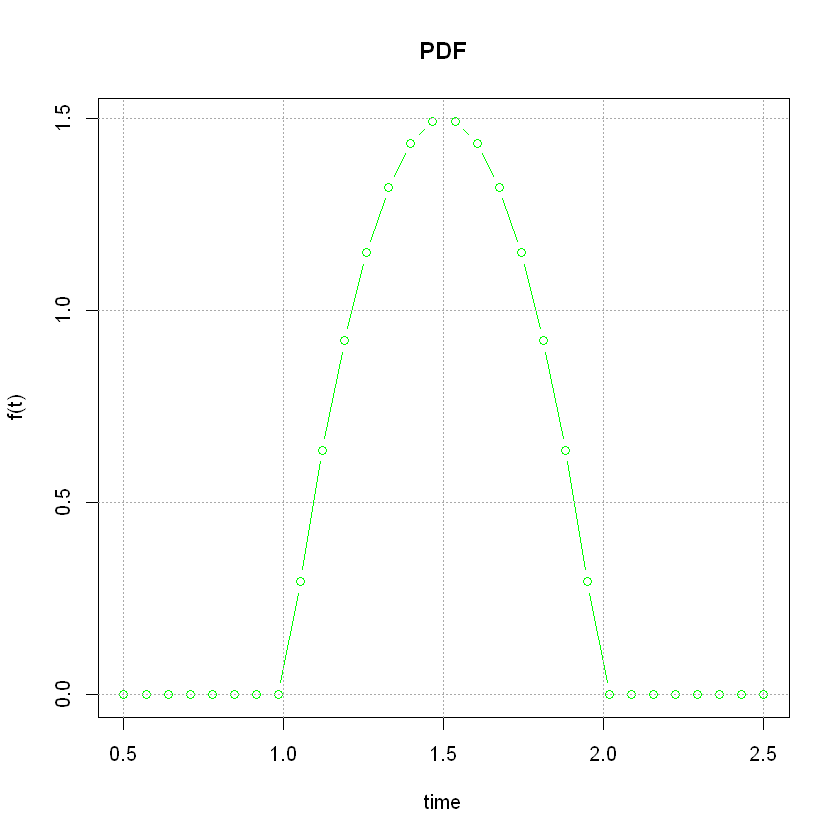

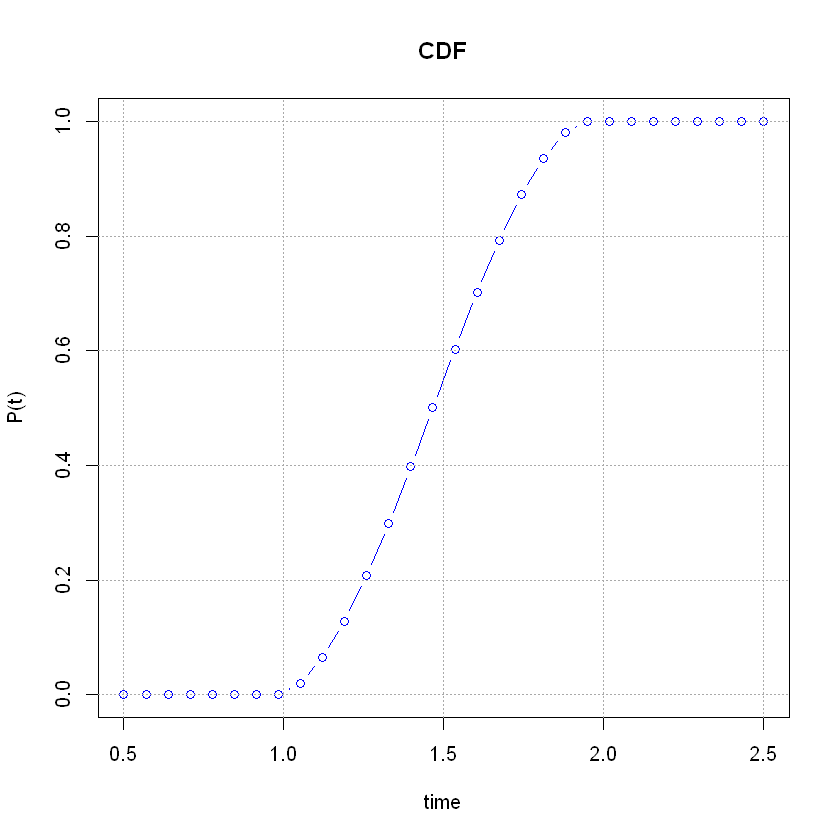

In [12]:
t<-seq(0.5,2.5,length=30)
plot(t,pdf(t=t),type="b",col="green",,xlab="time",ylab="f(t)",main="PDF")
grid(nx = NULL, ny = NULL, col = "darkgray", lty = "dotted")


prob<-c()
for (i in 1:length(t)){
    prob<-c(prob,cdf(t=t,x=t[i]))
}
plot(t,prob,type="b",col="blue",,xlab="time",ylab="P(t)",main="CDF")
grid(nx = NULL, ny = NULL, col = "darkgray", lty = "dotted")



### c) evaluate the probability that the student will finish the aptitude test in more than75 minutes. And that it will take 90 and 120 minutes.

In [13]:
t<-seq(1,2,0.0001)

cat("A student will finish the test in more than 75 minutes with probability",1-cdf(t=t,x=1.25),"\n" )

cat("A student will finish the test between 90 and 120 minutes with probability",cdf(t=t,x=2)-cdf(t=t,x=1.5) )

A student will finish the test in more than 75 minutes with probability 0.8436938 
A student will finish the test between 90 and 120 minutes with probability 0.499925

## Exercise 6

### • the lifetime of tires sold by an used tires shop is 10<sup>4</sup> ·x km, where x is a random variable following the distribution funcion

### f(X) = 2/x<sup>2</sup> 1 < x < 2 ,  f(X) =0 otherwise

In [14]:
life_time<-function(t){ return(2.0/t**2) }
cat("The pdf of function is normalized?\n")
1.0-integrate(life_time,1,2)$value<.Machine$double.eps^0.25


The pdf of function is normalized?


[1] TRUE

In [15]:
#density
pdf2<-function(t){
    f2<-c()
    for (i in 1:length(t) ) {
        if(t[i]>1 & t[i]<2){
            f2<-c( f2,2/(t[i]*t[i] ) )} else  { 
        f2<-c(f2,0)}
    }
    return(f2)
}

#cumulative
cdf2<-function(t,x,pdf2=parent.frame()$pdf2) {
    dx<-t[2]-t[1]
    
    if(x>=2){
    return(1)
    }
    
    cum<-c(dx*pdf2(t=t)[1:which(t==x) ] ) 
    
    if(x<2){
    return(sum(cum))
    }

}

#quantile
qdf2<-function(t,q,cdf2=parent.frame()$cdf2,pdf2=parent.frame()$pdf2){
    i<-1
    P<-0
    
    if(q>1){
        return(cat('q must be less or equal than 1 !') )
        break
    }
    
    if(q<1){
        while(P<q){
            i<-i+1
            P<-cdf2(t=t,x=t[i])

        }
        return(t[i])
        }
    if(q==1){
        return(2)
    }
    
    
}   

#generation numbers

rdf2<-function(a,b,n,M=life_time(t=1) ){
    r_numb<-c()
    
    while(length(r_numb)<n){
    
    r1<-runif(n=1)
    r2<-runif(n=1)
        
    x1<-a+(b-a)*r1
    y<-M*r2
    
    if( y<=life_time(t=x1) ){
        r_numb<-c(r_numb,x1)
    }
        
    }
    
    return(r_numb)
}


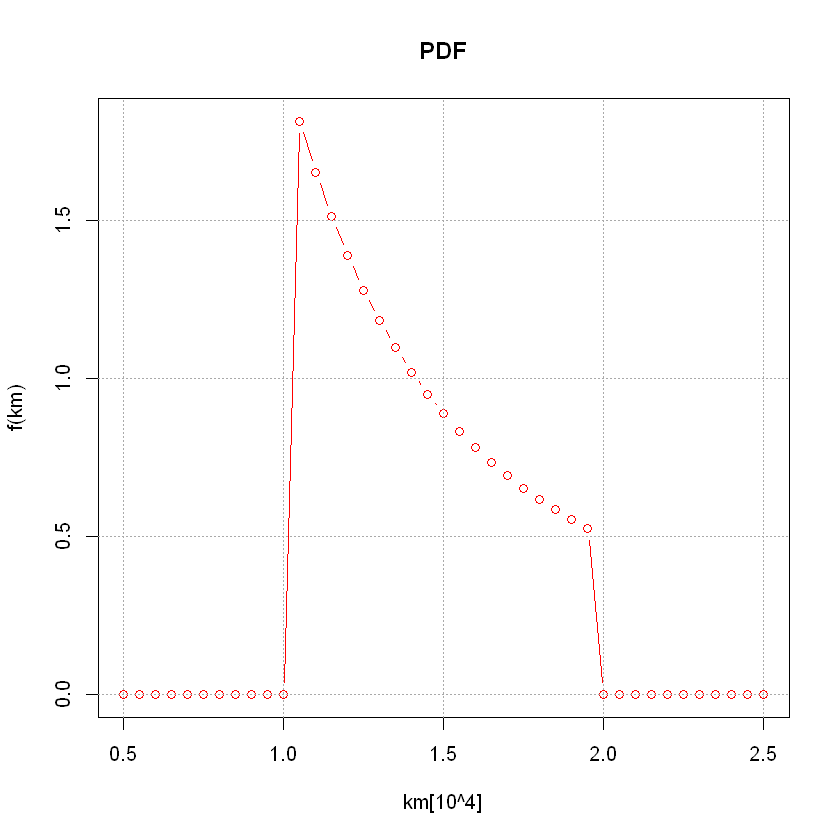

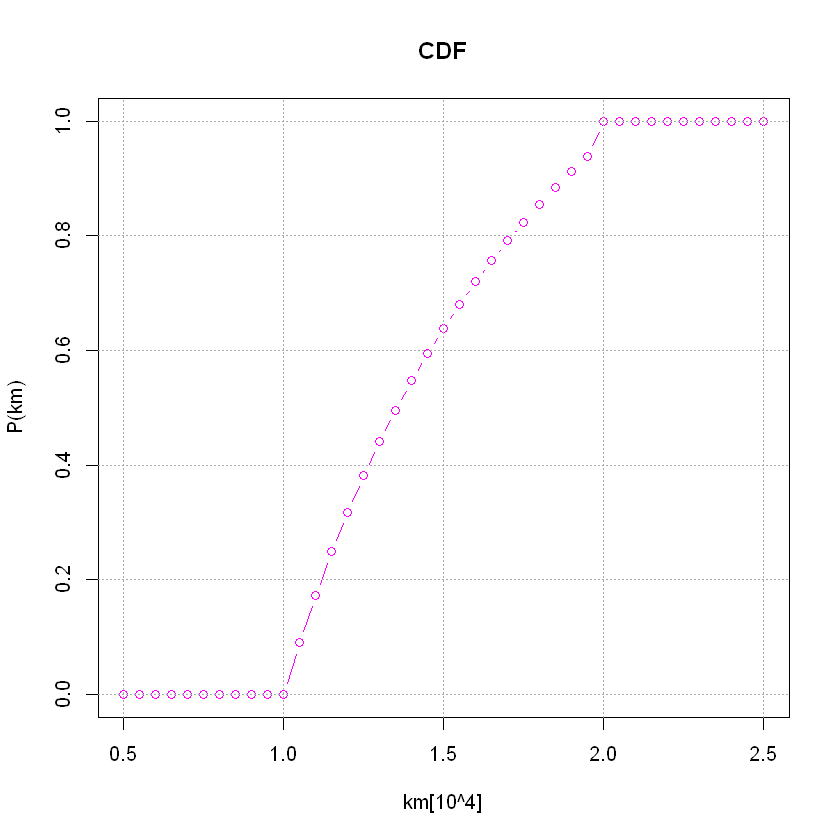

In [16]:
t<-seq(0.5,2.5,0.05)
plot(t,pdf2(t=t),type="b",col="red",xlab="km[10^4]",ylab="f(km)",main="PDF")
grid(nx = NULL, ny = NULL, col = "darkgray", lty = "dotted")


prob2<-c()
for (i in 1:length(t)){
    prob2<-c(prob2,cdf2(t=t,x=t[i]))
}
plot(t,prob2,type="b",col="magenta",xlab="km[10^4]",ylab="P(km)",main="CDF")
grid(nx = NULL, ny = NULL, col = "darkgray", lty = "dotted")

### c) sample 3000 random variables from the distribution and determine the mean valueand the variance, using the expression V ar(X) = E[X<sup>2</sup>] − E[X]<sup>2</sup>


In [17]:
t<-seq(1,2,0.0001)

cat("Tires will last less then 15000 km with probability ",cdf2(t=t,x=1.5),"\n" )

Tires will last less then 15000 km with probability  0.6666111 


In [18]:
f_generated<-rdf2(1,2,3000)
E_x<-mean(f_generated)
E_xx<-mean(f_generated**2)
Var_x<-E_xx-E_x**2

cat("The Var(x) of generated numbers is",Var_x*10^4,"km^2")

The Var(x) of generated numbers is 807.4065 km^2